# Example 7: Multiscale data clustering with PyGenStability

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pygenstability as pgs

We generate two circles with multiscale structure.

In [2]:
from sklearn.utils import shuffle

def generate_circles(n_samples_out=300,n_groups_out=3,gap_out=np.pi/15,n_samples_in=300,n_groups_in=3,gap_in=np.pi/8,offset_in=np.pi/7,factor=0.5,   noise=0.03,with_shuffle=True,seed=0):
    """Generate two circles with multiscale structure.
    
    Code adapted from: https://github.com/scikit-learn/scikit-learn/blob/f07e0138bfee41cd2c0a5d0251dc3fe03e6e1084/sklearn/datasets/_samples_generator.py#L738

    """

    rng = np.random.default_rng(seed)

    # generate outer circle that is split into groups
    linspace_out = []
    for i in range(n_groups_out):
        linspace_out += list(np.linspace(i* 2/n_groups_out * np.pi + gap_out/2, (i+1) * 2/n_groups_out * np.pi - gap_out/2, int(n_samples_out/n_groups_out), endpoint=False))
    outer_circ_x = np.cos(linspace_out)
    outer_circ_y = np.sin(linspace_out)

    # generate inner circle that is split into groups
    linspace_in = []
    for j in range(n_groups_out):
        linspace_in += list(np.linspace(j* 2/n_groups_in * np.pi + gap_in/2, (j+1) * 2/n_groups_in * np.pi - gap_in/2, int(n_samples_in/n_groups_in), endpoint=False)+offset_in)
    inner_circ_x = np.cos(linspace_in) * factor
    inner_circ_y = np.sin(linspace_in) * factor

    # combine circles
    X = np.vstack(
        [np.append(outer_circ_x, inner_circ_x), np.append(outer_circ_y, inner_circ_y)]
    ).T

    # create group labels
    y = np.zeros(n_samples_out+n_samples_in)
    for i in range(n_groups_in):
        y[int(i*n_samples_in/n_groups_in):int((i+1)*n_samples_in/n_groups_in)] = i
    for i in range(n_groups_out):
        y[int(n_samples_in+i*n_samples_out/n_groups_out):int(n_samples_in+(i+1)*n_samples_out/n_groups_out)] = i+n_groups_in

    # add noise to data
    if noise is not None:
        X += rng.normal(scale=noise, size=X.shape)

    # shuffle data
    if with_shuffle:
        X, y = shuffle(X,y,random_state=seed)
    
    return X, y

    


In [3]:
X, y = generate_circles()

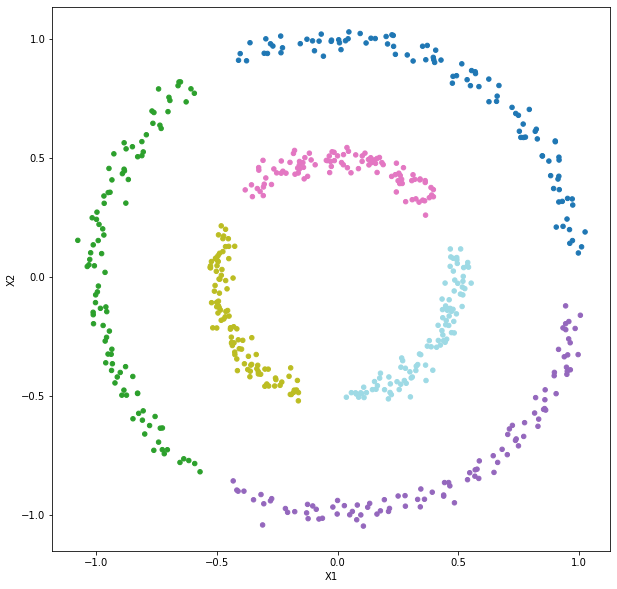

In [4]:
# define coordinates for plotting
x_coord = X[:,0]
y_coord = X[:,1]

# plot
fig, ax = plt.subplots(1,figsize=(10,10))
scatter = ax.scatter(x_coord,y_coord,s=20, c=y, zorder=10, cmap="tab20")
ax.set(xlabel="X1", ylabel="X2")
plt.show()

We can run multiscale data clustering with PyGenStability, where first a geometric graph is constructed from the data that gets than analysed with Markov Stability.

In [5]:
# apply multiscale data clustering to synthetic data
clustering = pgs.DataClustering(
    metric="euclidean",
    graph_method="cknn",
    k=5,
    delta=1.0,
    constructor="linearized",
    min_scale=-3.0,
    max_scale=0.0,
    n_scale=50,
    with_spectral_gap=True)
results = clustering.fit(X)

100%|██████████| 50/50 [00:00<00:00, 256.17it/s]


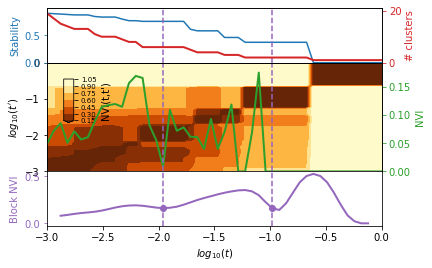

In [6]:
# summary plot for PyGenStability scan
clustering.scale_selection(kernel_size=0.2)
clustering.plot_scan()

We plot the (non-trivial) robust partitions found by PyGenStability and recover the ground truth partitions at the two different scales.

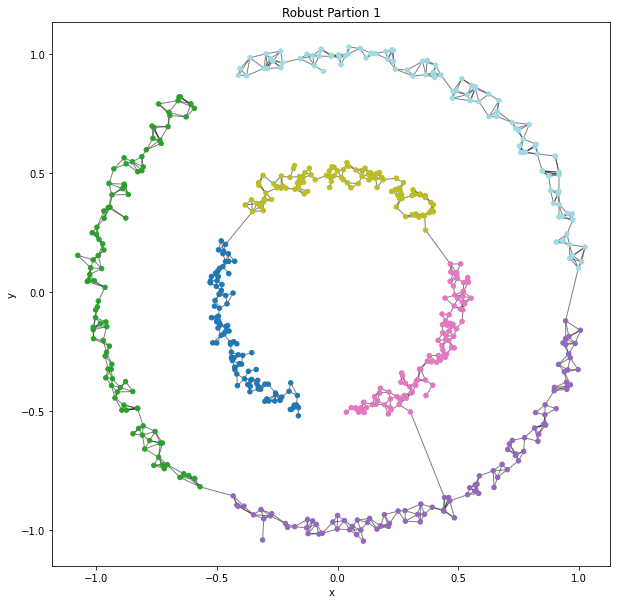

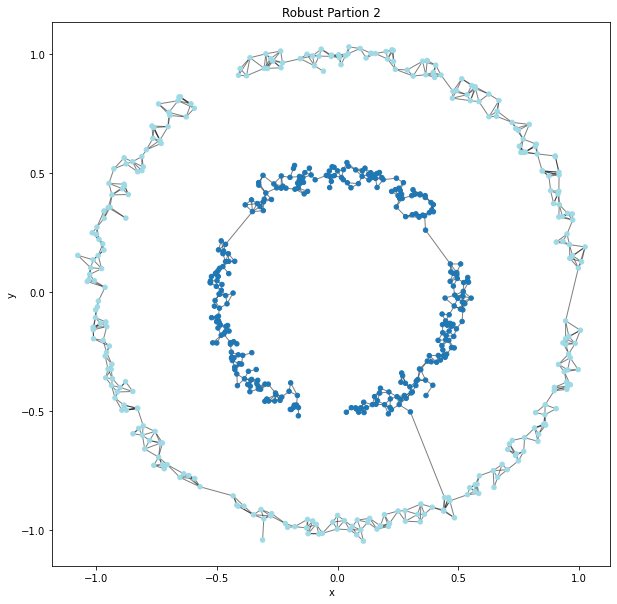

In [7]:
# plot robust partitions
clustering.plot_robust_partitions(x_coord=x_coord,y_coord=y_coord)